# Import thư viện cần thiết

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Điều chính kích thước và độ phóng chung cho các biểu đồ trong bài tập này.

In [68]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100

Đọc dữ liệu

In [69]:
train = pd.read_csv('../data/train.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


# Khám phá dữ liệu

## Tỷ lệ nam và nữ trong các hộ gia đình

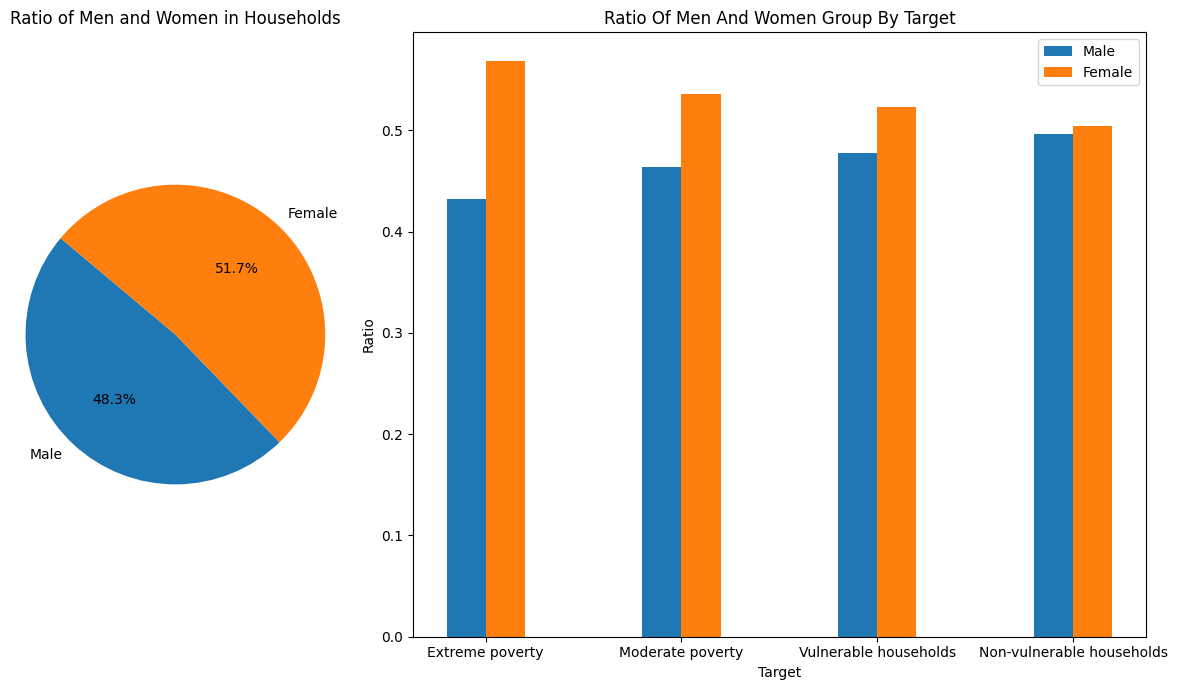

In [70]:
total_males = train['male'].sum()
total_females = train['female'].sum()

male_ratio = total_males / (total_males + total_females)
female_ratio = total_females / (total_males + total_females)

labels = ['Male', 'Female']
colors = ['#1f77b4', '#ff7f0e']
sizes_pie = [male_ratio.mean(), female_ratio.mean()]

# Pie chart
plt.subplot2grid((1, 3), (0, 0)) 
plt.pie(sizes_pie, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Men and Women in Households')
plt.axis('equal')

# Bar chart
male_by_target = train.groupby('Target')['male'].sum()
female_by_target = train.groupby('Target')['female'].sum()

male_ratio = male_by_target / (male_by_target + female_by_target)
female_ratio = female_by_target / (male_by_target + female_by_target)

labels_bar = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
index_bar = np.arange(len(labels_bar))
bar_width = 0.2

plt.subplot2grid((1, 3), (0, 1), colspan=2)
plt.bar(index_bar, male_ratio, bar_width, label=labels[0], color=colors[0])
plt.bar(index_bar + bar_width, female_ratio, bar_width, label=labels[1], color=colors[1])
plt.xlabel('Target')
plt.ylabel('Ratio')
plt.title('Ratio Of Men And Women Group By Target')
plt.xticks(index_bar + bar_width / 2, labels_bar)

plt.legend()
plt.tight_layout()
plt.show()


#### Nhận xét
- Tỷ lệ nam và nữ trong các hộ gia đình không có sự chênh lệch lớn.
- Kết hợp với cột 'Target' để thấy được tỉ lệ giữa nam và nữ của từng mức độ nghèo. Sự chênh lệch lớn nhất giữa nam và nữ trong các hộ gia đình nghèo ở cấp độ Extreme poverty, đồng thời sự chênh lệch này có xu hướng giảm dần từ Exemte poverty đến Non-vulnerable households.

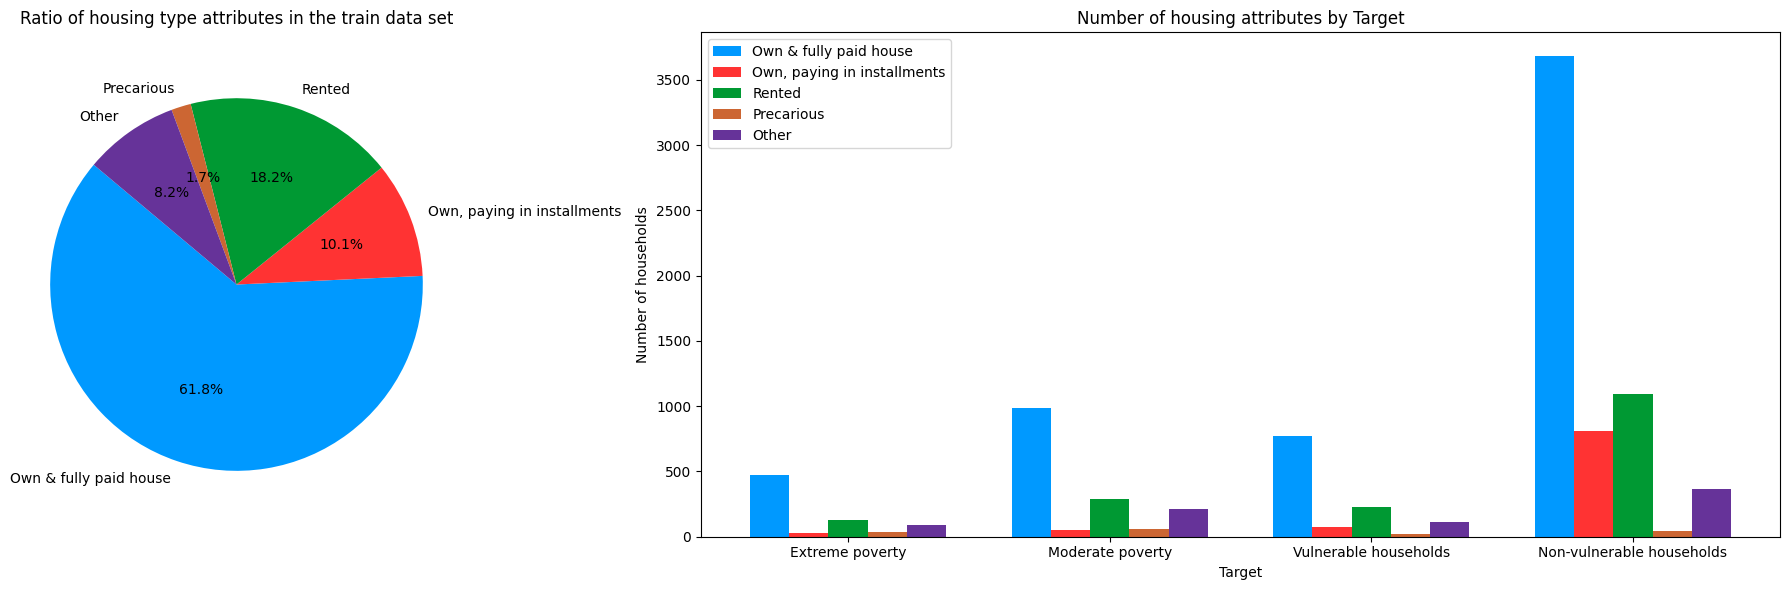

In [72]:
total_tipovivi1 = train['tipovivi1'].sum()
total_tipovivi2 = train['tipovivi2'].sum()
total_tipovivi3 = train['tipovivi3'].sum()
total_tipovivi4 = train['tipovivi4'].sum()
total_tipovivi5 = train['tipovivi5'].sum()

total_houses = total_tipovivi1 + total_tipovivi2 + total_tipovivi3 + total_tipovivi4 + total_tipovivi5

sizes = [total_tipovivi1, total_tipovivi2, total_tipovivi3, total_tipovivi4, total_tipovivi5]
labels = ['Own & fully paid house', 'Own, paying in installments', 'Rented', 'Precarious', 'Other']
colors = ['#0099FF', '#FF3333', '#009933', '#CC6633', '#663399']
percentages = [100 * size / total_houses for size in sizes]

# Pie char
plt.figure(figsize=(18, 6))  
plt.subplot2grid((1, 3), (0, 0)) 
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of housing type attributes in the train data set')
plt.axis('equal')

total_tipovivi1_by_target = train.groupby('Target')['tipovivi1'].sum()
total_tipovivi2_by_target = train.groupby('Target')['tipovivi2'].sum()
total_tipovivi3_by_target = train.groupby('Target')['tipovivi3'].sum()
total_tipovivi4_by_target = train.groupby('Target')['tipovivi4'].sum()
total_tipovivi5_by_target = train.groupby('Target')['tipovivi5'].sum()

labels = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
index = np.arange(len(labels))
bar_width = 0.15
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightgrey']

# Bar chart
plt.subplot2grid((1, 3), (0, 1), colspan=2)
plt.bar(index, total_tipovivi1_by_target, bar_width, label='Own & fully paid house', color='#0099FF')
plt.bar(index + bar_width, total_tipovivi2_by_target, bar_width, label='Own, paying in installments', color='#FF3333')
plt.bar(index + 2*bar_width, total_tipovivi3_by_target, bar_width, label='Rented', color='#009933')
plt.bar(index + 3*bar_width, total_tipovivi4_by_target, bar_width, label='Precarious', color='#CC6633')
plt.bar(index + 4*bar_width, total_tipovivi5_by_target, bar_width, label='Other', color='#663399')

plt.xlabel('Target')
plt.ylabel('Number of households')
plt.title('Number of housing attributes by Target')
plt.xticks(index + 2*bar_width, labels)
plt.legend()

plt.tight_layout()
plt.show()